<a href="https://colab.research.google.com/github/fajarpw/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import PIL.Image as Image
import math
import matplotlib.pyplot as plt
import glob

Gamma Correection Pada Citra
---------------------------
Masukkan nilai gamma:5


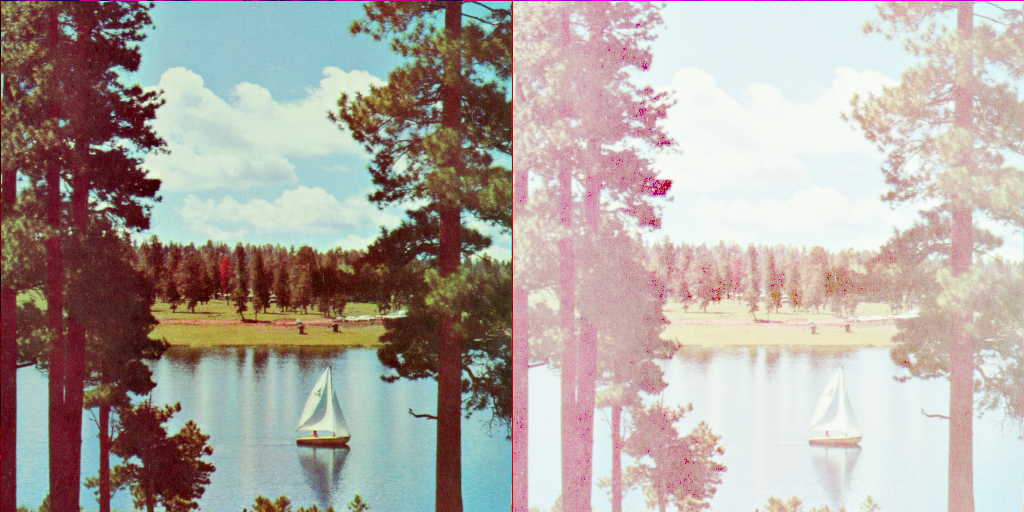

In [ ]:
#Praktimum 1
print('Gamma Correection Pada Citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai gamma:'))
except ValueError:
  print('Error, not a number')


original_image = cv.imread('/content/drive/MyDrive/PCVK2/sailboat.tiff')
gamma_corrected = np.zeros(original_image.shape, original_image.dtype)

#Akses per piksel
for i in range(original_image.shape[0]):
  for j in range(original_image.shape[1]):
    for k in range(original_image.shape[2]):
      gamma_corrected[i,j,k] = np.clip(255 * ((original_image[i,j,k] / 255) ** (1/gamma)) , 0, 255)


result = cv.hconcat((original_image, gamma_corrected))
cv2_imshow(result)

Simulasi Image Depth Pada Citra
-------------------------------
Masukkan nilai bit-depth [1-7]: 1


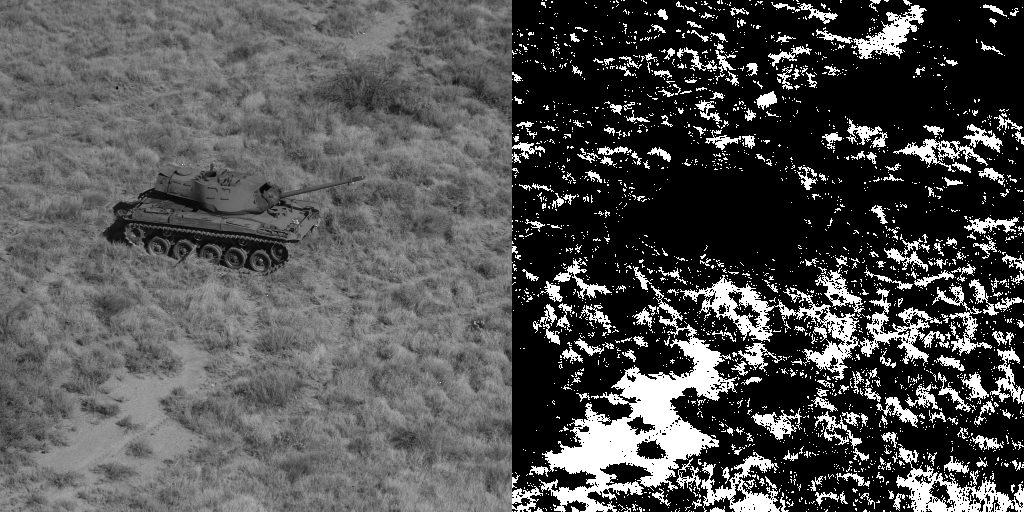

In [ ]:
#Praktikum 2
print('Simulasi Image Depth Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK2/tank.tiff')
converted_image = np.zeros(original_image.shape, original_image.dtype)


try:
  bitDepth = int(input('Masukkan nilai bit-depth [1-7]: '))
except ValueError:
  print('Error, not a number')


for i in range(original_image.shape[0]):
  for j in range(original_image.shape[1]):
    for k in range(original_image.shape[2]):
      level = 255 / (pow(2,bitDepth) - 1)
      result = round(original_image[i,j,k] / level) * level
      converted_image[i,j,k] = np.clip(result, 0, 255)


result = cv.hconcat((original_image, converted_image))
cv2_imshow(result)



Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100
19.758317288501708


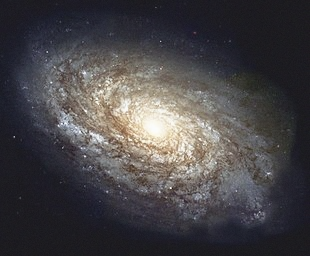

In [121]:
#Praktikum 3
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK2/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]

  
noised_image = noised_image / jumlah_citra

psnr = PSNR(original_image, noised_image)
print(psnr)
cv2_imshow(noised_image)

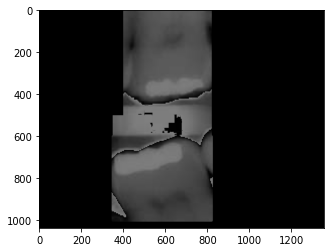

In [109]:
original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/teeth.jpg')

mask = np.zeros(original_image.shape, original_image.dtype)
mask1 = cv.rectangle(square_mask,pt1=(350,500),pt2=(820,1000),color=(255,255,255), thickness=-1)
mask2 = cv.rectangle(square_mask,pt1=(400,0),pt2=(820,500),color=(255,255,255), thickness=-1)

masked_image = original_image & mask1
masked_image = original_image & mask2

plt.imshow(masked_image)

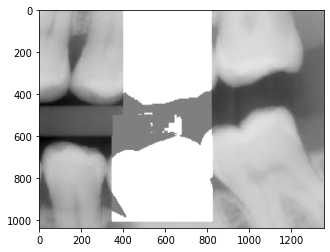

In [101]:
original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/teeth.jpg')

mask = np.zeros(original_image.shape, dtype=np.uint8)
mask1 = cv.rectangle(square_mask,pt1=(350,500),pt2=(820,1000),color=(255,255,255), thickness=-1)
mask2 = cv.rectangle(square_mask,pt1=(400,0),pt2=(820,500),color=(255,255,255), thickness=-1)

masked_image = original_image | mask1
masked_image = original_image | mask2

plt.imshow(original_image)
plt.imshow(masked_image)

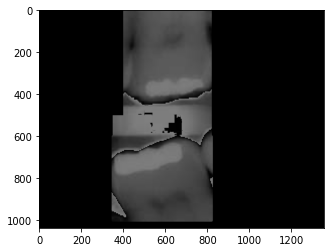

In [102]:
original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/teeth.jpg')

mask = np.zeros(original_image.shape, dtype=np.uint8)
mask1 = cv.rectangle(square_mask,pt1=(350,500),pt2=(820,1000),color=(255,255,255), thickness=-1)
mask2 = cv.rectangle(square_mask,pt1=(400,0),pt2=(820,500),color=(255,255,255), thickness=-1)

masked_image = original_image & mask1
masked_image = original_image & mask2

plt.imshow(original_image)
plt.imshow(masked_image)

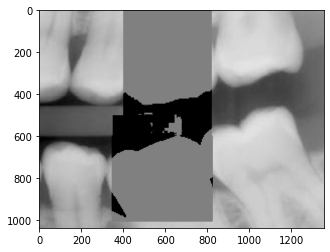

In [124]:
original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/teeth.jpg')

mask = np.zeros(original_image.shape, dtype=np.uint8)
mask1 = cv.rectangle(square_mask,pt1=(350,500),pt2=(820,1000),color=(255,255,255), thickness=-1)
mask2 = cv.rectangle(square_mask,pt1=(400,0),pt2=(820,500),color=(255,255,255), thickness=-1)

masked_image = original_image & ~mask1
masked_image = original_image & ~mask2

plt.imshow(masked_image)

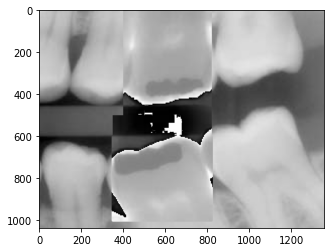

In [104]:
original_image = cv.imread('/content/drive/MyDrive/PCVK2/Images/teeth.jpg')

mask = np.zeros(original_image.shape, dtype=np.uint8)
mask1 = cv.rectangle(square_mask,pt1=(350,500),pt2=(820,1000),color=(255,255,255), thickness=-1)
mask2 = cv.rectangle(square_mask,pt1=(400,0),pt2=(820,500),color=(255,255,255), thickness=-1)

masked_image = original_image ^ mask1
masked_image = original_image ^ mask2

plt.imshow(original_image)
plt.imshow(masked_image)